# Workshop 9: Convolutional Neural Network
## 1. Gradient Descent for MLP

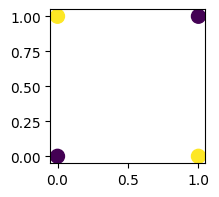

In [262]:
import numpy as np
from matplotlib import pyplot as plt

data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0
y = np.array([0,1,1,0])

plt.figure(figsize=[2,2])
plt.scatter(data_2D[:,1], data_2D[:,2],c=y,s=100)

In [263]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = np.array([0,1,1,0]).reshape(-1,1)
alpha = 0.1

for epoch in range(50000):
    z_1 = data_2D@theta_1
    h_1 = 1/(1+np.exp(-z_1))
    z_2 = h_1@theta_2
    h_2 = 1/(1+np.exp(-z_2))
    
    theta_2-=alpha*h_1.T@(h_2-y)
    theta_1-=alpha*data_2D.T@(((h_2-y)@theta_2.T)*h_1*(1-h_1))
    
    
z_1 = data_2D@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

h_2

array([[0.00364041],
       [0.99804858],
       [0.99804858],
       [0.00308653]])

## 2. Convolutional Neural Network
### 2.1 Importing the image

In [264]:
import cv2

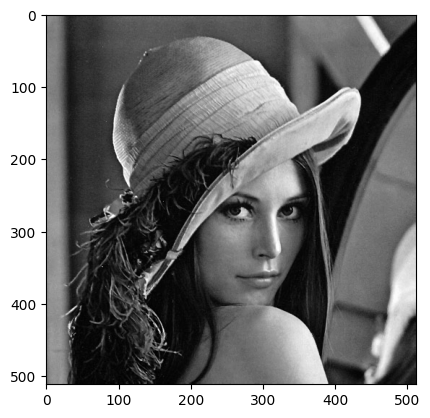

In [267]:
testimage = cv2.imread("lena.png",0)
plt.imshow(testimage,cmap="gray")
#testimage.shape

### 2.2 Padding

In [270]:
PaddingGreyTestImage = np.pad(testimage, ((1,1),(1,1)))
PaddingGreyTestImage

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 140, 140, ...,  90,  90,   0],
       [  0, 140, 140, ...,  90,  90,   0],
       ...,
       [  0, 106, 106, ...,  23,  23,   0],
       [  0, 106, 106, ...,  23,  23,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

### 2.3 Convolution



In [285]:
Con_kernel = [1,1,1,1,1,1,1,1,1]
#Con_kernel = [1,1,1,1,2,1,1,1,1]
#Con_kernel = [1,2,1,2,4,2,1,2,1]

#Con_kernel = [0,-1,0,-1,5,-1,0,-1,0]
#Con_kernel = [-1,-1,-1,-1,9,-1,-1,-1,-1] 
#Con_kernel = [1,-2,1,-2,5,-2,1,-2,1] 

#Con_kernel = [-1,0,-1,0,4,0,-1,0,-1]
#Con_kernel = [-1,-1,-1,-1,8,-1,-1,-1,-1]

#Con_kernel = [-1,0,1,-2,0,2,-1,0,1]
#Con_kernel = [1,2,1,0,0,0,-1,-2,-1]
#Con_kernel = [2,1,0,1,0,-1,0,-1,-2]

In [286]:
PaddingGreyTestImage.shape

(514, 514)

In [287]:
Pixel_list=[]
for i in range(1,513):
    for j in range(1,513):
        neighbourlist=[]
        neighbourlist.append(PaddingGreyTestImage[i-1][j-1]*Con_kernel[0])
        neighbourlist.append(PaddingGreyTestImage[i-1][j]*Con_kernel[1])
        neighbourlist.append(PaddingGreyTestImage[i-1][j+1]*Con_kernel[2])
        neighbourlist.append(PaddingGreyTestImage[i][j-1]*Con_kernel[3])
        neighbourlist.append(PaddingGreyTestImage[i][j]*Con_kernel[4])
        neighbourlist.append(PaddingGreyTestImage[i][j+1]*Con_kernel[5])
        neighbourlist.append(PaddingGreyTestImage[i+1][j-1]*Con_kernel[6])
        neighbourlist.append(PaddingGreyTestImage[i+1][j]*Con_kernel[7])
        neighbourlist.append(PaddingGreyTestImage[i+1][j+1]*Con_kernel[8])
    
        Pixel_list.append(sum(neighbourlist))
        
Conv_image = np.array(Pixel_list).reshape(512,512)

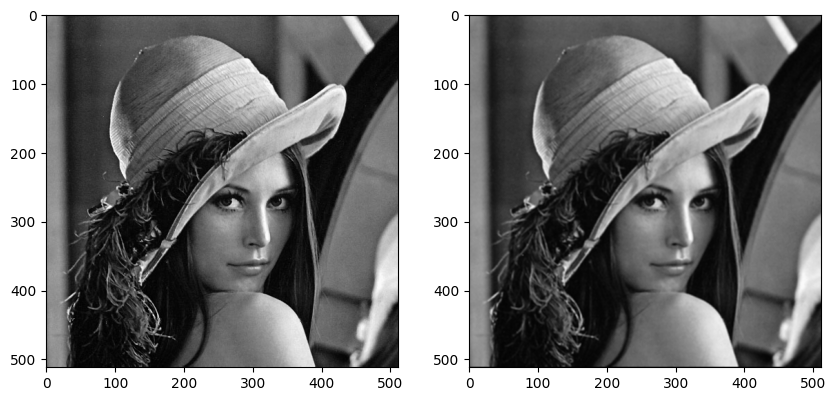

In [288]:
plt.figure(figsize=[10,10])

plt.subplot(1,2,1)
plt.imshow(testimage,cmap='gray',vmin=0, vmax=255)
PaddingGreyTestImage
plt.subplot(1,2,2)
plt.imshow(Conv_image/9,cmap='gray',vmin=0, vmax=255)

### 2.4 Pooling

In [283]:
Poolinglist=[]
for i in range(0,512,2):
    for j in range(0,512,2):
        neighbourlist=[]
        neighbourlist.append(testimage[i][j])
        neighbourlist.append(testimage[i][j+1])
        neighbourlist.append(testimage[i+1][j])
        neighbourlist.append(testimage[i+1][j+1])
    
        Poolinglist.append(max(neighbourlist))
        
PoolingImage = np.array(Poolinglist).reshape(256,256)

Poolinglist=[]
for i in range(0,256,2):
    for j in range(0,256,2):
        neighbourlist=[]
        neighbourlist.append(PoolingImage[i][j])
        neighbourlist.append(PoolingImage[i][j+1])
        neighbourlist.append(PoolingImage[i+1][j])
        neighbourlist.append(PoolingImage[i+1][j+1])
    
        Poolinglist.append(max(neighbourlist))
        
PoolingImage = np.array(Poolinglist).reshape(128,128)

Poolinglist=[]
for i in range(0,128,2):
    for j in range(0,128,2):
        neighbourlist=[]
        neighbourlist.append(PoolingImage[i][j])
        neighbourlist.append(PoolingImage[i][j+1])
        neighbourlist.append(PoolingImage[i+1][j])
        neighbourlist.append(PoolingImage[i+1][j+1])
    
        Poolinglist.append(max(neighbourlist))
        
PoolingImage = np.array(Poolinglist).reshape(64,64)

Poolinglist=[]
for i in range(0,64,2):
    for j in range(0,64,2):
        neighbourlist=[]
        neighbourlist.append(PoolingImage[i][j])
        neighbourlist.append(PoolingImage[i][j+1])
        neighbourlist.append(PoolingImage[i+1][j])
        neighbourlist.append(PoolingImage[i+1][j+1])
    
        Poolinglist.append(max(neighbourlist))
        
PoolingImage = np.array(Poolinglist).reshape(32,32)

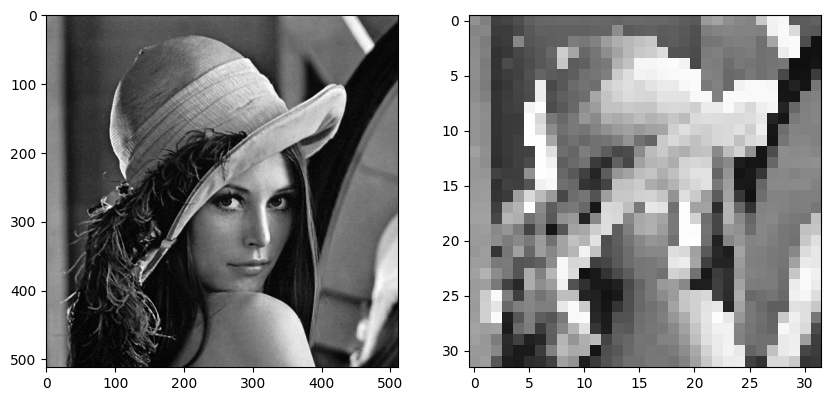

In [284]:
plt.figure(figsize=[10,10])

plt.subplot(1,2,1)
plt.imshow(testimage,cmap='gray',vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(PoolingImage,cmap='gray',vmin=0, vmax=255)

#### Exercise. Could you use the other method (average pooling) to implement the pooling operation?

### 2.5 Fully-connection

In [292]:
PoolingImage.reshape(1,-1).shape

(1, 1024)